## Simples exemplo de uso do pytorch para classificar números manuscritos

**leituras recomendadas (e que tambem precisei para escrever esse script):**

* https://matheusfacure.github.io/2017/05/15/deep-ff-ann-pytorch/
* http://deeplearningbook.com.br/funcao-de-ativacao/


In [1]:
import torch
from torch import autograd, nn
from torch.nn import functional as F

from sklearn import datasets
import numpy as np

import matplotlib.pyplot as plt

In [2]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.in_to_h1 = nn.Linear(input_size, hidden_size)
        self.h1_to_h2 = nn.Linear(hidden_size, hidden_size)
        self.h2_to_out = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = F.relu(self.in_to_h1(x))
        x = F.relu(self.h1_to_h2(x))
        x = self.h2_to_out(x)
        return x

In [3]:
ds = datasets.load_digits()

In [4]:
x_batch = ds.data.astype(np.float32)
y_batch = ds.target
x_batch = torch.FloatTensor(x_batch.tolist())
y_batch = torch.LongTensor(y_batch.tolist())

x_batch = autograd.Variable(x_batch)
y_batch = autograd.Variable(y_batch)
    
x_batch, y_batch = autograd.Variable(x_batch, ), autograd.Variable(y_batch)

In [5]:
batch_size = x_batch.shape[0]
input_size = x_batch.shape[1]
hidden_size = 128
num_classes = len(ds.target_names)
learning_rate = 1e-5

In [6]:
print('inpt: ', x_batch)
print('target: ', y_batch.view(1, -1))

inpt:  tensor([[  0.,   0.,   5.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,  10.,   0.,   0.],
        [  0.,   0.,   0.,  ...,  16.,   9.,   0.],
        ...,
        [  0.,   0.,   1.,  ...,   6.,   0.,   0.],
        [  0.,   0.,   2.,  ...,  12.,   0.,   0.],
        [  0.,   0.,  10.,  ...,  12.,   1.,   0.]])
target:  tensor([[ 0,  1,  2,  ...,  8,  9,  8]])


In [7]:
model = Model(input_size, hidden_size, num_classes)
print(model)

Model(
  (in_to_h1): Linear(in_features=64, out_features=128, bias=True)
  (h1_to_h2): Linear(in_features=128, out_features=128, bias=True)
  (h2_to_out): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
%%time

criterion = nn.CrossEntropyLoss() # define o custo de entropia cruzada
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
# opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

for epoch in range(100):
    optimizer.zero_grad()
    
    logit = model(x_batch)
    loss = criterion(logit, y_batch)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'epoch: {epoch} | loss:{loss.item()}')


epoch: 0 | loss:2.4547500610351562
epoch: 10 | loss:0.1502559632062912
epoch: 20 | loss:0.040915049612522125
epoch: 30 | loss:0.010044598951935768
epoch: 40 | loss:0.0028940257616341114
epoch: 50 | loss:0.0011215369449928403
epoch: 60 | loss:0.000569865689612925
epoch: 70 | loss:0.00037850209628231823
epoch: 80 | loss:0.00028599362121894956
epoch: 90 | loss:0.0002365583786740899
CPU times: user 29 s, sys: 243 ms, total: 29.3 s
Wall time: 28.9 s


In [9]:
out = model(x_batch)

tensor de saída:  tensor([-36.7698,  -6.9950,  31.8018,  -7.3230, -18.5295,  -4.9313,
        -25.2274,  -9.0327,  -3.7554,   2.5035])


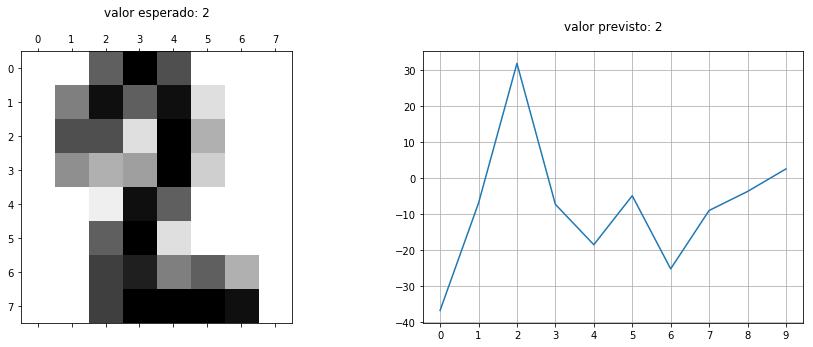

In [12]:
index = 268

print("tensor de saída: ", out[index])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.matshow(ds.images[index], cmap=plt.cm.gray_r)
ax1.set_title(f"valor esperado: {y_batch[index]}\n")

ax2.plot(out[index].detach().numpy())
ax2.grid(True)
ax2.set_title(f"valor previsto: {out[index].argmax()}\n")
plt.setp(ax2, xticks=list(range(num_classes)));